## 1. Libraries and Path


In [1]:
path = "C:/Users/bvarghese/Desktop/IESEG Slides/Financial Programming- Python- Phan Minh/Web Scrapping/EPEX SPOT/Germany"

In [2]:
#External Libraries specifically added for predictive analysis
import sys
sys.path.append(path)

import numpy                as np
import pandas               as pd
import seaborn              as sns
import calendar

from pandas                 import DataFrame
from pandas                 import read_csv
from pandas                 import pivot_table
from pandas                 import Series
from pandas                 import get_dummies
from numpy                  import random
from numpy                  import where
from numpy                  import nan
from numpy                  import array
from math                   import pi
from matplotlib             import pyplot as plt
from bokeh.plotting         import figure, show, output_file, output_notebook
from bokeh.palettes         import Spectral11, colorblind, Inferno, BuGn, brewer, Spectral3
from bokeh.models           import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.models           import LinearAxis, Range1d
from bokeh.layouts          import column, row
from bokeh.models.widgets   import Tabs, Panel
from bokeh.transform        import dodge
from bokeh.transform        import transform


In [3]:
#Paths
directory = path
inputData = directory + "/Data"
sandbox   = directory + "/Sandbox"


## 2. Data Preparation

In [4]:
#Inscpecting the data

#print(data.head())
#print(data.tail())
#print(data.columns)
#print(data.dtypes)
#print(data.shape)


In [5]:
#Reading in the data
data = read_csv(inputData + "/IntradayContinuousEPEXSPOT_DE.csv", sep = ',')

In [6]:
#Inspecting the DateTime column
data['DateTime'] = pd.to_datetime(data['DateTime'])

#Extracting the year 
data['Date'] = data['DateTime'].dt.date
data['Hour'] = data['DateTime'].dt.hour
data['Month'] = data['DateTime'].dt.month
data['Weekday'] = data['DateTime'].dt.day_name()
data['Year'] = data['DateTime'].dt.year

#Converting them to strings for graphical purposes
data.Year = data.Year.astype(str)
data.Month = data.Month.astype(str)
data.Weekday = data.Weekday.astype(str)

## 3. Creating a basic graphical overview of the data

In [7]:
#Visulising the data across years 

data_years = data[['Buy_Vol', 'Sell_Vol', 'Low', 'High', 'Weighted_Avg']].groupby(data.Year).mean().round(2)
data_years = data_years.reset_index()
data_years.Year= data_years['Year'].astype(int)

#Visulising the data across years 

data_months = data[['Buy_Vol', 'Sell_Vol', 'Low', 'High', 'Weighted_Avg']].groupby(data.Month).mean().round(2)
data_months = data_months.reset_index()
data_months.Month= data_months['Month'].astype(int)
data_months = data_months.sort_values(by= 'Month')


In [8]:
#Overview Across Years

data_dict = data_years.to_dict(orient='list')
Years = data_years['Year'].tolist()

source1 = ColumnDataSource(data= data_dict)

p1 = figure(y_range=(0, data_years[['Buy_Vol','Sell_Vol']].values.max() + 1000), 
           plot_height=250, title="Overview across Years", x_axis_label = "Years", y_axis_label = "Volume in MWh",
           toolbar_location=None, tools="")

p1.vbar(x=dodge('Year', -0.3, range=p1.x_range), top='Buy_Vol', width=0.2, source=source1,
       color="#c9d9d3", legend=value("Buying Volume"))

p1.vbar(x=dodge('Year',  -0.1,  range=p1.x_range), top='Sell_Vol', width=0.2, source=source1,
       color="#718dbf", legend=value("Selling Volume"))


p1.extra_y_ranges = {"Weighted_Avg_range": Range1d(start=0, end=80)}
p1.add_layout(LinearAxis(y_range_name="Weighted_Avg_range", axis_label = "Prices"), 'right')
p1.line('Year', 'Low', line_width=2, source= source1, legend= 'Low Price', y_range_name='Weighted_Avg_range', color='red')
p1.line('Year', 'High', line_width=2, source= source1, legend= 'High Price', y_range_name='Weighted_Avg_range', color='green')

p1.x_range.range_padding = 0.2
p1.xgrid.grid_line_color = None
p1.legend.location = "top_left"
p1.legend.orientation = "horizontal"

#show(p1)

#Overview across Months

dict_months = data_months.to_dict(orient='list')
Months = data_months['Month'].tolist()

source2 = ColumnDataSource(data= dict_months)

p2 = figure(y_range=(0, data_months[['Buy_Vol','Sell_Vol']].values.max() + 1000), 
           plot_height=250, title="Overview across Months", x_axis_label = "Months", y_axis_label = "Volume in MWh",
           toolbar_location=None, tools="")

p2.vbar(x=dodge('Month', -0.3, range=p2.x_range), top='Buy_Vol', width=0.2, source=source2,
       color="#c9d9d3", legend=value("Buying Volume"))

p2.vbar(x=dodge('Month',  -0.1,  range=p2.x_range), top='Sell_Vol', width=0.2, source=source2,
       color="#718dbf", legend=value("Selling Volume"))

p2.extra_y_ranges = {"Weighted_Avg_range": Range1d(start=0, end=80)}
p2.add_layout(LinearAxis(y_range_name="Weighted_Avg_range", axis_label ="Prices"), 'right')
p2.line('Month', 'Low', line_width=2, source= source2, legend= 'Low Price', y_range_name='Weighted_Avg_range', color='red')
p2.line('Month', 'High', line_width=2, source= source2, legend= 'High Price', y_range_name='Weighted_Avg_range', color='green')

p2.x_range.range_padding = 0.2
p2.xgrid.grid_line_color = None
p2.legend.location = "top_left"
p2.legend.orientation = "horizontal"

#show(p2)

#Combining two overview layouts

overview1 = column(p1, p2)

## 4. Analysing the Volume Traded

In [9]:
#Required Table to see overview of Buying Volumes across Years and Months
temp = data.pivot_table(index = 'Year', columns = 'Month', values = 'Buy_Vol', aggfunc = 'mean')

#Unstacking the created table
df = pd.DataFrame(temp.stack(), columns=['Vol']).reset_index()
df.Vol = df.Vol.round(2)
df = df.sort_values(by='Month')

#Required Table to see overview of Buying Volumes across Years and Months
temp2 = data.pivot_table(index = 'Year', columns = 'Month', values = 'Sell_Vol', aggfunc = 'mean')

#Reshaping the created table
df2 = pd.DataFrame(temp2.stack(), columns=['Vol']).reset_index()
df2.Vol = df2.Vol.round(2)
df2 = df2.sort_values(by='Month')

In [10]:
#Buying Volumes across Years and Months

source3 = ColumnDataSource(df)

# this is the colormap from the original NYTimes plot
colors = ["#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.Vol.min(), high=df.Vol.max())

p3 = figure(plot_width=800, plot_height=300, title="Buying Volumes",
           x_range=list(temp.index), y_range=list(reversed(temp.columns)), x_axis_label = "Years", y_axis_label = "Months",
           toolbar_location=None, tools="hover", x_axis_location="above")

p3.rect(x='Year', y="Month", width=1, height=1, source=source3,
       line_color=None, fill_color=transform('Vol', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"))

p3.add_layout(color_bar, 'right')

p3.axis.axis_line_color = None
p3.axis.major_tick_line_color = None
p3.axis.major_label_text_font_size = "5pt"
p3.axis.major_label_standoff = 0
p3.xaxis.major_label_orientation = 1.0

p3.hover.tooltips = [
    ("Year", "@Year"),
    ("Month", "@Month"),
    ("Buy_Vol", "@Vol"),
]

#Selling Volumes across Years and Months

source4 = ColumnDataSource(df2)

# this is the colormap from the original NYTimes plot
colors = ["#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.Vol.min(), high=df.Vol.max())

p4 = figure(plot_width=800, plot_height=300, title="Selling Volumes",
           x_range=list(temp2.index), y_range=list(reversed(temp2.columns)),x_axis_label = "Years", y_axis_label = "Months",
           toolbar_location=None, tools="hover", x_axis_location="above")

p4.rect(x='Year', y="Month", width=1, height=1, source=source4,
       line_color=None, fill_color=transform('Vol', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"))

p4.add_layout(color_bar, 'right')

p4.axis.axis_line_color = None
p4.axis.major_tick_line_color = None
p4.axis.major_label_text_font_size = "5pt"
p4.axis.major_label_standoff = 0
p4.xaxis.major_label_orientation = 1.0

p4.hover.tooltips = [
    ("Year", "@Year"),
    ("Month", "@Month"),
    ("Buy_Vol", "@Vol"),
]

#Combining two overview layouts

heatmap = column(p3, p4)

## 5. Analysing correlation between different variables

In [11]:
#Buying Volume versus Prices

source = ColumnDataSource(data)

#Scatter Plot between Buying Volume and Weighted Price Index
# Create the figure: p5
p5 = figure(plot_width=500, plot_height=300, x_axis_label ='Buying Volume', y_axis_label ='Weighted Avg of Prices')

# Add a circle glyph to the figure p5
p5.circle(data.Buy_Vol, data.Weighted_Avg)

#Scatter Plot between Buying Volume and Low Price
# Create the figure: p6
p6 = figure(plot_width=500, plot_height=300, x_axis_label ='Buying Volume', y_axis_label ='Low Price')

# Add a circle glyph to the figure p6
p6.circle(data.Buy_Vol, data.Low, color = "navy")

#Scatter Plot between Buying Volume and High Price
# Create the figure: p7
p7 = figure(plot_width=500, plot_height=300, x_axis_label ='Buying Volume', y_axis_label ='High Price')

# Add a circle glyph to the figure p
p7.circle(data.Buy_Vol, data.High, color = "olive")

#Selling Volume versus Prices

#Scatter Plot between Selling Volume and Weighted Price Index
# Create the figure: p5
p8 = figure(plot_width=500, plot_height=300, x_axis_label ='Selling Volume', y_axis_label ='Weighted Avg of Prices')

# Add a circle glyph to the figure p5
p8.circle(data.Sell_Vol, data.Weighted_Avg, color = "firebrick")

#Scatter Plot between Selling Volume and Low Price
# Create the figure: p6
p9 = figure(plot_width=500, plot_height=300, x_axis_label ='Selling Volume', y_axis_label ='Low Price')

# Add a circle glyph to the figure p6
p9.circle(data.Sell_Vol, data.Low, color = "green")

#Scatter Plot between Selling Volume and High Price
# Create the figure: p7
p10 = figure(plot_width=500, plot_height=300, x_axis_label ='Selling Volume', y_axis_label ='High Price')

# Add a circle glyph to the figure p
p10.circle(data.Sell_Vol, data.High, color = "yellow")

#Combining two overview layouts
prices = column(row(p5, p6, p7), row(p8, p9, p10))


## 6. Reading in a new file for ID3 Prices

In [12]:
#Reading in the data
ID3 = read_csv(inputData + "/ID3 Germany.csv", sep = ',')

In [13]:
#Inspecting the DateTime column
ID3['DateTime'] = pd.to_datetime(ID3['DateTime'])

#Extracting the year 
ID3['Date'] = ID3['DateTime'].dt.date
ID3['Hour'] = ID3['DateTime'].dt.hour
ID3['Month'] = ID3['DateTime'].dt.month
ID3['Weekday'] = ID3['DateTime'].dt.day_name()
ID3['Year'] = ID3['DateTime'].dt.year

In [14]:
ID3_table = pd.DataFrame(ID3['ID3'].groupby(ID3.Year).describe())
ID3_table

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,4489.0,32.988075,15.571989,-89.14,26.1200,32.73,41.5800,167.27
2016,8784.0,29.241321,13.921440,-184.89,22.3975,28.71,35.6600,134.01
2017,8760.0,34.309097,19.572368,-128.27,26.8500,34.03,41.6425,239.74
2018,8760.0,44.539708,19.046037,-71.47,34.0750,45.08,55.4625,209.15


C:\Users\bvarghese\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


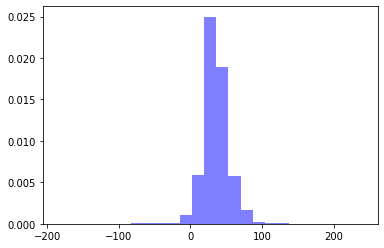

In [15]:
import matplotlib.mlab as mlab

num_bins = 25
n, bins, patches = plt.hist(ID3.ID3, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

## 7. Analysing the Data based on the Seasons

### ID3 Seasonal Monday

In [16]:
#Subsetting the ID3 Dataset for values associated to Monday
Monday = ID3[ID3.Weekday == 'Monday']

#Creating the pivoted table
seasons_M = Monday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_M = seasons_M.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring = pd.DataFrame(seasons_M.iloc[2:5,:].sum(axis = 0).round(2))
spring = spring.transpose()
spring.iloc[0, 0] = "Spring"

#Summer: From June to August
summer = pd.DataFrame(seasons_M.iloc[5:8,:].sum(axis = 0).round(2))
summer = summer.transpose()
summer.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn = pd.DataFrame(seasons_M.iloc[8:11,:].sum(axis = 0).round(2))
autumn = autumn.transpose()
autumn.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter = pd.concat([seasons_M.head(2), seasons_M.tail(1)]).sum(axis = 0).round(2)
winter =  pd.DataFrame(winter)
winter = winter.transpose()
winter.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_M = pd.concat([spring, summer, autumn, winter],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_M = seasons_final_M.transpose()

#Replacing the first row as column headers
new_header = seasons_final_M.iloc[0] 
seasons_final_M.columns = new_header 
seasons_final_M = seasons_final_M.drop(seasons_final_M.index[0])

#Viewing the results
seasons_final_M.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,64.74,95.21,85.36,74.01
1,60.87,87.47,81.42,67.73
2,57.72,83.77,77.04,59.51
3,56.52,78.97,72.06,55.49
4,58.42,77.18,73.03,55.94


### ID3 Seasonal Tuesday

In [17]:
#Subsetting the ID3 Dataset for values associated to Tuesday
Tuesday = ID3[ID3.Weekday == 'Tuesday']

#Creating the pivoted table
seasons_T = Tuesday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_T = seasons_T.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_T = pd.DataFrame(seasons_T.iloc[2:5,:].sum(axis = 0).round(2))
spring_T = spring_T.transpose()
spring_T.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_T = pd.DataFrame(seasons_T.iloc[5:8,:].sum(axis = 0).round(2))
summer_T = summer_T.transpose()
summer_T.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_T = pd.DataFrame(seasons_T.iloc[8:11,:].sum(axis = 0).round(2))
autumn_T = autumn_T.transpose()
autumn_T.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_T = pd.concat([seasons_T.head(2), seasons_T.tail(1)]).sum(axis = 0).round(2)
winter_T =  pd.DataFrame(winter_T)
winter_T = winter_T.transpose()
winter_T.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_T = pd.concat([spring_T, summer_T, autumn_T, winter_T],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_T = seasons_final_T.transpose()

#Replacing the first row as column headers
new_header = seasons_final_T.iloc[0] 
seasons_final_T.columns = new_header 
seasons_final_T = seasons_final_T.drop(seasons_final_T.index[0])

#Viewing the results
seasons_final_T.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,80.89,103.45,98.55,69.11
1,76.93,96.34,95.24,63.01
2,75.06,92.2,91.89,59.88
3,73.32,88.43,89.86,60.61
4,73.16,88.31,91.4,66.5


### ID3 Seasonal Wednesday

In [18]:
#Subsetting the ID3 Dataset for values associated to Wednesday
Wednesday = ID3[ID3.Weekday == 'Wednesday']

#Creating the pivoted table
seasons_W = Wednesday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_W = seasons_W.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_W = pd.DataFrame(seasons_W.iloc[2:5,:].sum(axis = 0).round(2))
spring_W = spring_W.transpose()
spring_W.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_W = pd.DataFrame(seasons_W.iloc[5:8,:].sum(axis = 0).round(2))
summer_W = summer_W.transpose()
summer_W.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_W = pd.DataFrame(seasons_W.iloc[8:11,:].sum(axis = 0).round(2))
autumn_W = autumn_W.transpose()
autumn_W.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_W = pd.concat([seasons_W.head(2), seasons_W.tail(1)]).sum(axis = 0).round(2)
winter_W =  pd.DataFrame(winter_W)
winter_W = winter_W.transpose()
winter_W.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_W = pd.concat([spring_W, summer_W, autumn_W, winter_W],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_W = seasons_final_W.transpose()

#Replacing the first row as column headers
new_header_W = seasons_final_W.iloc[0] 
seasons_final_W.columns = new_header_W 
seasons_final_W = seasons_final_W.drop(seasons_final_W.index[0])

#Viewing the results
seasons_final_W.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,85.29,99.74,91.12,83.25
1,81.65,94.8,86.94,76.74
2,77.77,91.02,82.78,74.82
3,75.32,85.16,82.19,71.35
4,76.38,83.64,86.18,73.68


### ID3 Seasonal Thursday

In [19]:
#Subsetting the ID3 Dataset for values associated to Thursday
Thursday = ID3[ID3.Weekday == 'Thursday']

#Creating the pivoted table
seasons_Th = Thursday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_Th = seasons_Th.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_Th = pd.DataFrame(seasons_Th.iloc[2:5,:].sum(axis = 0).round(2))
spring_Th = spring_Th.transpose()
spring_Th.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_Th = pd.DataFrame(seasons_Th.iloc[5:8,:].sum(axis = 0).round(2))
summer_Th = summer_Th.transpose()
summer_Th.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_Th = pd.DataFrame(seasons_Th.iloc[8:11,:].sum(axis = 0).round(2))
autumn_Th = autumn_Th.transpose()
autumn_Th.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_Th = pd.concat([seasons_Th.head(2), seasons_Th.tail(1)]).sum(axis = 0).round(2)
winter_Th =  pd.DataFrame(winter_Th)
winter_Th = winter_Th.transpose()
winter_Th.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_Th = pd.concat([spring_Th, summer_Th, autumn_Th, winter_Th],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_Th = seasons_final_Th.transpose()

#Replacing the first row as column headers
new_header_Th = seasons_final_Th.iloc[0] 
seasons_final_Th.columns = new_header_Th
seasons_final_Th = seasons_final_Th.drop(seasons_final_Th.index[0])

#Viewing the results
seasons_final_Th.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,81.93,100.66,98.58,82.97
1,79,95.53,96.09,81.27
2,76.2,92.75,92.83,79.07
3,73.04,88.58,91.03,74.82
4,73.74,85.38,93.35,75.72


### ID3 Seasonal Friday

In [20]:
#Subsetting the ID3 Dataset for values associated to Friday
Friday = ID3[ID3.Weekday == 'Friday']

#Creating the pivoted table
seasons_F = Friday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_F = seasons_F.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_F = pd.DataFrame(seasons_F.iloc[2:5,:].sum(axis = 0).round(2))
spring_F = spring_F.transpose()
spring_F.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_F = pd.DataFrame(seasons_F.iloc[5:8,:].sum(axis = 0).round(2))
summer_F = summer_F.transpose()
summer_F.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_F = pd.DataFrame(seasons_F.iloc[8:11,:].sum(axis = 0).round(2))
autumn_F = autumn_F.transpose()
autumn_F.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_F = pd.concat([seasons_F.head(2), seasons_F.tail(1)]).sum(axis = 0).round(2)
winter_F =  pd.DataFrame(winter_F)
winter_F = winter_F.transpose()
winter_F.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_F = pd.concat([spring_F, summer_F, autumn_F, winter_F],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_F = seasons_final_F.transpose()

#Replacing the first row as column headers
new_header_F = seasons_final_F.iloc[0] 
seasons_final_F.columns = new_header_F 
seasons_final_F = seasons_final_F.drop(seasons_final_F.index[0])

#Viewing the results
seasons_final_F.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,83.38,98.98,101.59,89.38
1,79.85,95.25,99.78,83.91
2,77.67,91.69,97.44,80.59
3,75.69,87.33,94.98,75.59
4,76.84,88.8,95.77,75.58


### ID3 Seasonal Saturday

In [21]:
#Subsetting the ID3 Dataset for values associated to Saturday
Saturday = ID3[ID3.Weekday == 'Saturday']

#Creating the pivoted table
seasons_S = Saturday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_S = seasons_S.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_S = pd.DataFrame(seasons_S.iloc[2:5,:].sum(axis = 0).round(2))
spring_S = spring_S.transpose()
spring_S.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_S = pd.DataFrame(seasons_S.iloc[5:8,:].sum(axis = 0).round(2))
summer_S = summer_S.transpose()
summer_S.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_S = pd.DataFrame(seasons_S.iloc[8:11,:].sum(axis = 0).round(2))
autumn_S = autumn_S.transpose()
autumn_S.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_S = pd.concat([seasons_S.head(2), seasons_S.tail(1)]).sum(axis = 0).round(2)
winter_S =  pd.DataFrame(winter_S)
winter_S = winter_S.transpose()
winter_S.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_S = pd.concat([spring_S, summer_S, autumn_S, winter_S],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_S = seasons_final_S.transpose()

#Replacing the first row as column headers
new_header_S = seasons_final_S.iloc[0] 
seasons_final_S.columns = new_header_S 
seasons_final_S = seasons_final_S.drop(seasons_final_S.index[0])

#Viewing the results
seasons_final_S.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,83.69,101.81,102.52,83.9
1,79.16,96.45,97.71,76.22
2,75.86,90.52,92.5,72.1
3,72.14,85.96,91.97,70.42
4,72.52,83.13,91.61,71.01


### ID3 Seasonal Sunday

In [22]:
#Subsetting the ID3 Dataset for values associated to Sunday
Sunday = ID3[ID3.Weekday == 'Sunday']

#Creating the pivoted table
seasons_Su = Sunday.pivot_table(index = 'Month', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
seasons_Su = seasons_Su.reset_index()

##Categorising the data by the seasons and calculating the average prices for the same

#Spring: From March to May
spring_Su = pd.DataFrame(seasons_Su.iloc[2:5,:].sum(axis = 0).round(2))
spring_Su = spring_Su.transpose()
spring_Su.iloc[0, 0] = "Spring"

#Summer: From June to August
summer_Su = pd.DataFrame(seasons_Su.iloc[5:8,:].sum(axis = 0).round(2))
summer_Su = summer_Su.transpose()
summer_Su.iloc[0, 0] = "Summer"

#Autumn: From September to November
autumn_Su = pd.DataFrame(seasons_Su.iloc[8:11,:].sum(axis = 0).round(2))
autumn_Su = autumn_Su.transpose()
autumn_Su.iloc[0, 0] = "Autumn"

#Winter: From December to February
winter_Su = pd.concat([seasons_Su.head(2), seasons_Su.tail(1)]).sum(axis = 0).round(2)
winter_Su =  pd.DataFrame(winter_Su)
winter_Su = winter_Su.transpose()
winter_Su.iloc[0, 0] = "Winter"

#Stacking the individual season rows together
seasons_final_Su = pd.concat([spring_Su, summer_Su, autumn_Su, winter_Su],ignore_index=True)

#Transposing the created dataframe for graphical purposes
seasons_final_Su = seasons_final_Su.transpose()

#Replacing the first row as column headers
new_header_Su = seasons_final_Su.iloc[0] 
seasons_final_Su.columns = new_header_Su 
seasons_final_Su = seasons_final_Su.drop(seasons_final_Su.index[0])

#Viewing the results
seasons_final_Su.head()

Month,Spring,Summer,Autumn,Winter
Hour,,,,
0,68.1,88.83,79.74,63.55
1,57.17,77.23,71.73,54.21
2,52.05,69.61,64.6,50.55
3,47.16,65.14,66.31,47.73
4,49.01,62.84,64.2,47.36


### Combining all the charts together

In [23]:
source_M = ColumnDataSource(seasons_final_M)
source_T = ColumnDataSource(seasons_final_T)
source_W = ColumnDataSource(seasons_final_W)
source_Th = ColumnDataSource(seasons_final_Th)
source_F = ColumnDataSource(seasons_final_F)
source_S = ColumnDataSource(seasons_final_S)
source_Su = ColumnDataSource(seasons_final_Su)

p11 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Monday")
p12 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Tuesday")
p13 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Wednesday")
p14 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Thursday")
p15 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Friday")
p16 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Saturday")
p17 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=400, plot_height=400, title = "Sunday")

p11.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p11.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p11.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p11.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p12.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p12.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p12.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p12.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p13.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p13.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p13.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p13.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p14.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p14.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p14.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p14.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p15.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p15.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p15.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p15.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p16.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p16.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p16.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p16.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p17.line('Hour', 'Spring', line_width=2, color = 'green', source = source_M, legend=value("Spring"))
p17.line('Hour', 'Summer', line_width=2, color = 'yellow', source = source_M, legend=value("Summer"))
p17.line('Hour', 'Autumn', line_width=2, color =  'orange', source = source_M, legend=value("Autumn"))
p17.line('Hour', 'Winter', line_width=2, color = '#084594', source = source_M, legend=value("Winter"))

p11.legend.location = "top_left"
p12.legend.location = "top_left"
p13.legend.location = "top_left"
p14.legend.location = "top_left"
p15.legend.location = "top_left"
p16.legend.location = "top_left"
p17.legend.location = "top_left"

seasonal = column(row(p11, p12, p13, p14), row(p15, p16, p17))

In [24]:
#Creating an new column for season in ID3
Season = []

for obs in ID3['Month']:
    if obs == 3 or obs == 4 or obs == 5:
        Season.append('Spring')
    elif obs == 6 or obs == 7 or obs == 8:
        Season.append('Summer')
    elif obs == 9 or obs == 10 or obs == 11:
        Season.append('Autumn')
    else:
        Season.append('Winter')
        
ID3['Season'] = Season

In [25]:
#Subsetting the ID3 Dataset for values associated to Spring
Spring = ID3[ID3.Season == 'Spring']

#Creating the required table
spring_1 = Spring.pivot_table(index = 'Weekday', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
spring_1 = spring_1.transpose()

#Subsetting the ID3 Dataset for values associated to Summer
Summer = ID3[ID3.Season == 'Summer']

#Creating the required table
summer_1 = Summer.pivot_table(index = 'Weekday', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
summer_1 = summer_1.transpose()

#Subsetting the ID3 Dataset for values associated to Autumn
Autumn = ID3[ID3.Season == 'Autumn']

#Creating the required table
autumn_1 = Autumn.pivot_table(index = 'Weekday', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
autumn_1 = autumn_1.transpose()

#Subsetting the ID3 Dataset for values associated to Winter
Winter = ID3[ID3.Season == 'Winter']

#Creating the required table
winter_1 = Winter.pivot_table(index = 'Weekday', columns = 'Hour', values = 'ID3', aggfunc = 'mean').round(2)
winter_1 = winter_1.transpose()

In [26]:
source_spring = ColumnDataSource(spring_1)
source_summer = ColumnDataSource(summer_1)
source_autumn = ColumnDataSource(autumn_1)
source_winter = ColumnDataSource(winter_1)

p18 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "Spring")
p19 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "Summer")
p20 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "Autumn")
p21 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "Winter")

p18.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_spring, legend=value("Mon"))
p18.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_spring, legend=value("Tue"))
p18.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_spring, legend=value("Wed"))
p18.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_spring, legend=value("Thu"))
p18.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_spring, legend=value("Fri"))
p18.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_spring, legend=value("Sat"))
p18.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_spring, legend=value("Sun"))

p19.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_summer, legend=value("Mon"))
p19.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_summer, legend=value("Tue"))
p19.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_summer, legend=value("Wed"))
p19.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_summer, legend=value("Thu"))
p19.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_summer, legend=value("Fri"))
p19.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_summer, legend=value("Sat"))
p19.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_summer, legend=value("Sun"))

p20.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_autumn, legend=value("Mon"))
p20.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_autumn, legend=value("Tue"))
p20.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_autumn, legend=value("Wed"))
p20.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_autumn, legend=value("Thu"))
p20.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_autumn, legend=value("Fri"))
p20.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_autumn, legend=value("Sat"))
p20.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_autumn, legend=value("Sun"))

p21.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_winter, legend=value("Mon"))
p21.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_winter, legend=value("Tue"))
p21.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_winter, legend=value("Wed"))
p21.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_winter, legend=value("Thu"))
p21.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_winter, legend=value("Fri"))
p21.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_winter, legend=value("Sat"))
p21.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_winter, legend=value("Sun"))

p18.legend.location = "top_left"
p19.legend.location = "top_left"
p20.legend.location = "top_left"
p21.legend.location = "top_left"

seasonal_1 = column(row(p18, p19), row(p20, p21))
#output_file('seasonal_1.html')
#show(seasonal_1)





In [27]:
#Subsetting the ID3 Dataset for the year 2015
year_15 = ID3[ID3.Year == 2015]

#Creating the required table
y_15 = year_15.pivot_table(index = 'Hour', columns = 'Weekday', values = 'ID3', aggfunc = 'mean')
y_15 = y_15.reset_index()

#Subsetting the ID3 Dataset for the year 2016
year_16 = ID3[ID3.Year == 2016]

#Creating the required table
y_16 = year_16.pivot_table(index = 'Hour', columns = 'Weekday', values = 'ID3', aggfunc = 'mean')
y_16 = y_16.reset_index()

#Subsetting the ID3 Dataset for the year 2017
year_17 = ID3[ID3.Year == 2017]

#Creating the required table
y_17 = year_17.pivot_table(index = 'Hour', columns = 'Weekday', values = 'ID3', aggfunc = 'mean')
y_17 = y_17.reset_index()

#Subsetting the ID3 Dataset for the year 2018
year_18 = ID3[ID3.Year == 2018]

#Creating the required table
y_18 = year_18.pivot_table(index = 'Hour', columns = 'Weekday', values = 'ID3', aggfunc = 'mean')
y_18 = y_18.reset_index()


In [28]:
source_15 = ColumnDataSource(y_15)
source_16 = ColumnDataSource(y_16)
source_17 = ColumnDataSource(y_17)
source_18 = ColumnDataSource(y_18)

p22 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "2015")
p23 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "2016")
p24 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "2017")
p25 = figure(x_axis_label = 'Hours', y_axis_label = 'ID3 Prices', plot_width=450, plot_height=450, title = "2018")

p22.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_15, legend=value("Mon"))
p22.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_15, legend=value("Tue"))
p22.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_15, legend=value("Wed"))
p22.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_15, legend=value("Thu"))
p22.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_15, legend=value("Fri"))
p22.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_15, legend=value("Sat"))
p22.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_15, legend=value("Sun"))

p23.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_16, legend=value("Mon"))
p23.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_16, legend=value("Tue"))
p23.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_16, legend=value("Wed"))
p23.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_16, legend=value("Thu"))
p23.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_16, legend=value("Fri"))
p23.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_16, legend=value("Sat"))
p23.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_16, legend=value("Sun"))

p24.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_17, legend=value("Mon"))
p24.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_17, legend=value("Tue"))
p24.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_17, legend=value("Wed"))
p24.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_17, legend=value("Thu"))
p24.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_17, legend=value("Fri"))
p24.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_17, legend=value("Sat"))
p24.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_17, legend=value("Sun"))

p25.line('Hour', 'Monday', line_width=2, color = '#084594', source = source_18, legend=value("Mon"))
p25.line('Hour', 'Tuesday', line_width=2, color = 'navy', source = source_18, legend=value("Tue"))
p25.line('Hour', 'Wednesday', line_width=2, color =  'olive', source = source_18, legend=value("Wed"))
p25.line('Hour', 'Thursday', line_width=2, color = 'firebrick', source = source_18, legend=value("Thu"))
p25.line('Hour', 'Friday', line_width=2, color = 'yellow', source = source_18, legend=value("Fri"))
p25.line('Hour', 'Saturday', line_width=2, color = 'green', source = source_18, legend=value("Sat"))
p25.line('Hour', 'Sunday', line_width=2, color = '#B3DE69', source = source_18, legend=value("Sun"))

p22.legend.location = "top_left"
p23.legend.location = "top_left"
p24.legend.location = "top_left"
p25.legend.location = "top_left"

yearly = column(row(p22, p23), row(p24, p25))
#output_file('yearly.html')
#show(yearly)


## Creating the Tabs

In [29]:
#Creating individual Panels
first = Panel(child = overview1, title = "Data Overview across time")
second = Panel(child = heatmap, title = "Volume Traded across time")
third = Panel(child = prices, title = "Correlations")
fourth = Panel(child = seasonal, title = "ID3 Prices on different days across the seasons" )
fifth = Panel(child = seasonal_1, title = "ID3 Prices during different seasons across days")
sixth = Panel(child = yearly, title = "ID3 Prices across different years on different days")

#Creating a Tabs layout
tabs = Tabs(tabs = [first, second, third, fourth, fifth, sixth])

#Viewing the results
output_file("tabs.html")
show(tabs)